## Houses with planning permissions available to meet the housing demand in Dublin Area using supervised machine learning models: Performance study and comparison.

## Dataset: Tier 1 Sites with planning permission.

Task Force is focused to address supply-related issues to the delivery of units of houses in the Dublin area. The group are working together (Goverment and Dublin 4 local Planning authorities) to identify housing developments, which has approved planning permission and that are capable of delivering housing to the market.

Through this study is intended to be able to predict which houses(units) with planning permissions, in terms of the activity on site, which ones can be avaible to meet the market demand of houses in future, taking in consideration a dataset from Q1 2018.

In [1]:
#Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt # for visualization
%matplotlib inLine
sns.set(color_codes=True) 

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
# Load the dataset
#It has been chosen a dataset Sites with planning permission (Dublin Area)
planning_df = pd.read_csv('Dublin_Housing_Task_Force_Q1_2018.csv')

In [3]:
# Checking the shape of my data
planning_df.shape

(392, 12)

In [4]:
#Producing the dataset head. The first 5 rows
planning_df.head()

,OBJECTID,Planning_Authority,Tier,Planning_Reference,ITM_X_Coordinate,ITM_Y_Coordinate,Planning_Permission__Units_Perm,Units_Completed_to_Date,Units_Under_Construction,Activity_On_Site,Units_Permitted_But_Not_Commenc,Planning_Search_URL
0,1,Dublin City Council,1,2792/14,714587,734357,15,0,15,Y,0,http://www.dublincity.ie/swiftlg/apas/run/wpha...
1,2,Dublin City Council,1,2078/11,713809,734563,25,14,11,Y,0,http://www.dublincity.ie/swiftlg/apas/run/wpha...
2,3,Dublin City Council,1,3486/17,721878,741034,88,0,43,Y,45,http://www.dublincity.ie/swiftlg/apas/run/wpha...
3,4,Dublin City Council,1,3117/16,722691,741211,75,0,75,Y,0,http://www.dublincity.ie/swiftlg/apas/run/wpha...
4,5,Dublin City Council,1,3802/14,722549,741200,99,65,24,Y,10,http://www.dublincity.ie/swiftlg/apas/run/wpha...


## 1. EDA Analysis 

All the different stages of EDA analysis are going to be covered and also the Binomial dristribution which was applicable to one of the categorical features of this dataset.

In [5]:
# It can be seen that there is a skew in the data as the data is not spread out evenly.
# Checking the min and maximum values, it shows the scale of the data. This allows us to see 
# how the data has to be engineered for the machile learning model that is going to be implemented 

planning_df.describe()
# Find some of the summary statitistics of the database for the numerical features.

,OBJECTID,Tier,ITM_X_Coordinate,ITM_Y_Coordinate,Planning_Permission__Units_Perm,Units_Completed_to_Date,Units_Under_Construction,Units_Permitted_But_Not_Commenc
count,392.000000,392.0,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,196.500000,1.0,716161.676020,735886.568878,103.734694,21.066327,18.757653,63.910714
std,113.304898,0.0,6446.893706,8998.614140,173.161460,70.650038,38.969067,129.889978
min,1.000000,1.0,699805.000000,719544.000000,1.000000,0.000000,0.000000,0.000000
25%,98.750000,1.0,712365.250000,728692.500000,20.000000,0.000000,0.000000,4.000000
50%,196.500000,1.0,717417.500000,734234.500000,48.000000,0.000000,0.000000,21.000000
75%,294.250000,1.0,721521.500000,740748.000000,127.250000,1.250000,20.000000,63.500000
max,392.000000,1.0,729173.000000,764126.000000,2375.000000,642.000000,315.000000,1665.000000


In [6]:
# Total of entries and identify any missing data. As it can be seen below, 
# the dataset does not have any missing data.
planning_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   OBJECTID                         392 non-null    int64 
 1   Planning_Authority               392 non-null    object
 2   Tier                             392 non-null    int64 
 3   Planning_Reference               392 non-null    object
 4   ITM_X_Coordinate                 392 non-null    int64 
 5   ITM_Y_Coordinate                 392 non-null    int64 
 6   Planning_Permission__Units_Perm  392 non-null    int64 
 7   Units_Completed_to_Date          392 non-null    int64 
 8   Units_Under_Construction         392 non-null    int64 
 9   Activity_On_Site                 392 non-null    object
 10  Units_Permitted_But_Not_Commenc  392 non-null    int64 
 11  Planning_Search_URL              392 non-null    object
dtypes: int64(8), object(4)
memory usage:

In [7]:
#Categorical values and the number of times those values appear in the dataset. 
#This shows us the number of categories for each cathegorical value.
planning_df.describe(include=object)

,Planning_Authority,Planning_Reference,Activity_On_Site,Planning_Search_URL
count,392,392,392,392
unique,4,392,2,4
top,Dublin City Council,2792/14,N,http://www.dublincity.ie/swiftlg/apas/run/wpha...
freq,132,1,219,132


## Binomial Distribution
I will prepare a binomial distribution using my dataset, with the categorical feature "Planning_Autorities".

Assumption: What is the probability that the units with planning permissions have been granted by Dublin City Council? We'll use this dataset to find 𝑝̂ , an estimate of 𝑝 , which is the probability of a unit we find being granted by Dublin City Council.

In [8]:
#Dublin =  number of units with planning permission being granted by Dublin City Council

Dublin = planning_df.Planning_Authority == "Dublin City Council"
Dublin.head()

0    True
1    True
2    True
3    True
4    True
Name: Planning_Authority, dtype: bool

In [9]:
# Finding the proprotion of Dublin City Council in the dataset:
p_hat = Dublin.sum() / len(planning_df) # 33% is being Dubin City Council
p_hat

0.336734693877551

It is possible to make an assumption, finding a unit with planning permission is a Bernoulli trial with:

𝑃(Dublin)=𝑝̂ ≈0.33 = the probability of being granted by Dublin City Council and

𝑃(Dublin¯)=1−𝑝̂ ≈0.67. # problability of a unit being granted by any other planning authority

we could use binomial distribution to see from the next 10 planning authorities, what is the probability that is the probability of finding K Dublin City Council as planning autority? for each of 𝑘∈0,1,2,…,10.

Assumption: if the first planning autority would be Dublin city council, what would be the probability that the next one would be the same planning authority?

In [10]:
# I will try it with 2 probabilities of successes, 10 trials and 0.33 probability 
#of success on each trial:
from scipy.stats import binom

# Calculate binomial probability P(X = 2) when X ~ Binom(n = 10, p = 0.33)
# x = 2 successes
binom.pmf(k=2, n=10, p=0.33)

0.19899346538663168

In [11]:
# Printing all probabilities: evaluates the probability of 0,1 or 6 successes
from numpy import random
x = np.array([0, 1, 2, 3, 4, 5, 6])
out1 = binom.pmf(k=x, n=10, p=0.33)
out1

array([0.01822838, 0.08978156, 0.19899347, 0.26136455, 0.22528064,
       0.13315095, 0.05465151])

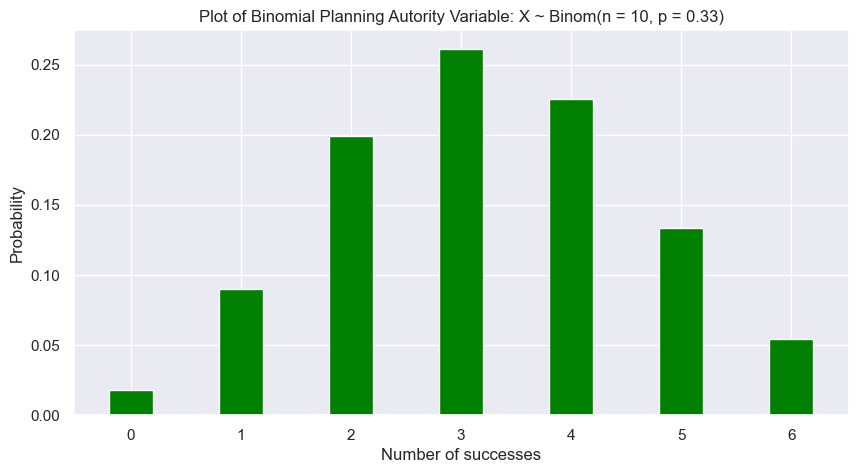

In [12]:
# Creating a plot:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))

# Creating the bar plot
plt.bar(x, out1, color ='green', width = 0.4)

plt.xlabel("Number of successes")
plt.ylabel("Probability")
plt.title("Plot of Binomial Planning Autority Variable: X ~ Binom(n = 10, p = 0.33)")
plt.show()

The probability of 2 success is **0.19.** The probability of success between 1 and 6 are high. In contrast the probability of succiding at 0 and 6 is small.

This can be tested if the probability of success is 5 as below, which will be **0.13:**

In [13]:
# Calculate binomial probability P(X = 5) when X ~ Binom(n = 10, p = 0.33)
# x = 5 successes
binom.pmf(k=5, n=10, p=0.33)

0.13315094518726242

In [14]:
# Verify the columns to see if there is any null value in the dataset. Dataset is clean from null values.
planning_df.isnull().sum()

OBJECTID                           0
Planning_Authority                 0
Tier                               0
Planning_Reference                 0
ITM_X_Coordinate                   0
ITM_Y_Coordinate                   0
Planning_Permission__Units_Perm    0
Units_Completed_to_Date            0
Units_Under_Construction           0
Activity_On_Site                   0
Units_Permitted_But_Not_Commenc    0
Planning_Search_URL                0
dtype: int64

In [15]:
# Rows containing duplicate data and there is no duplicate data
duplicate_rows_planning_df=planning_df[planning_df.duplicated()] 
print('number of duplicate rows: ', duplicate_rows_planning_df.shape)

number of duplicate rows:  (0, 12)


In [16]:
# Dropping irrelevant values as they will not produce any relevant information.
planning_df = planning_df.drop(["OBJECTID", "Tier", "Planning_Reference", "ITM_X_Coordinate", "ITM_Y_Coordinate", "Planning_Search_URL"], axis=1)
planning_df.head()

,Planning_Authority,Planning_Permission__Units_Perm,Units_Completed_to_Date,Units_Under_Construction,Activity_On_Site,Units_Permitted_But_Not_Commenc
0,Dublin City Council,15,0,15,Y,0
1,Dublin City Council,25,14,11,Y,0
2,Dublin City Council,88,0,43,Y,45
3,Dublin City Council,75,0,75,Y,0
4,Dublin City Council,99,65,24,Y,10


In [17]:
# Checking the correlation between variables
correlation = planning_df.corr()
print(correlation)

                                 Planning_Permission__Units_Perm  \
Planning_Permission__Units_Perm                         1.000000   
Units_Completed_to_Date                                 0.684950   
Units_Under_Construction                                0.337838   
Units_Permitted_But_Not_Commenc                         0.859223   

                                 Units_Completed_to_Date  \
Planning_Permission__Units_Perm                 0.684950   
Units_Completed_to_Date                         1.000000   
Units_Under_Construction                        0.307842   
Units_Permitted_But_Not_Commenc                 0.276854   

                                 Units_Under_Construction  \
Planning_Permission__Units_Perm                  0.337838   
Units_Completed_to_Date                          0.307842   
Units_Under_Construction                         1.000000   
Units_Permitted_But_Not_Commenc                 -0.017073   

                                 Units_Permitted_But

,Planning_Permission__Units_Perm,Units_Completed_to_Date,Units_Under_Construction,Units_Permitted_But_Not_Commenc
Planning_Permission__Units_Perm,1.000000,0.684950,0.337838,0.859223
Units_Completed_to_Date,0.684950,1.000000,0.307842,0.276854
Units_Under_Construction,0.337838,0.307842,1.000000,-0.017073
Units_Permitted_But_Not_Commenc,0.859223,0.276854,-0.017073,1.000000


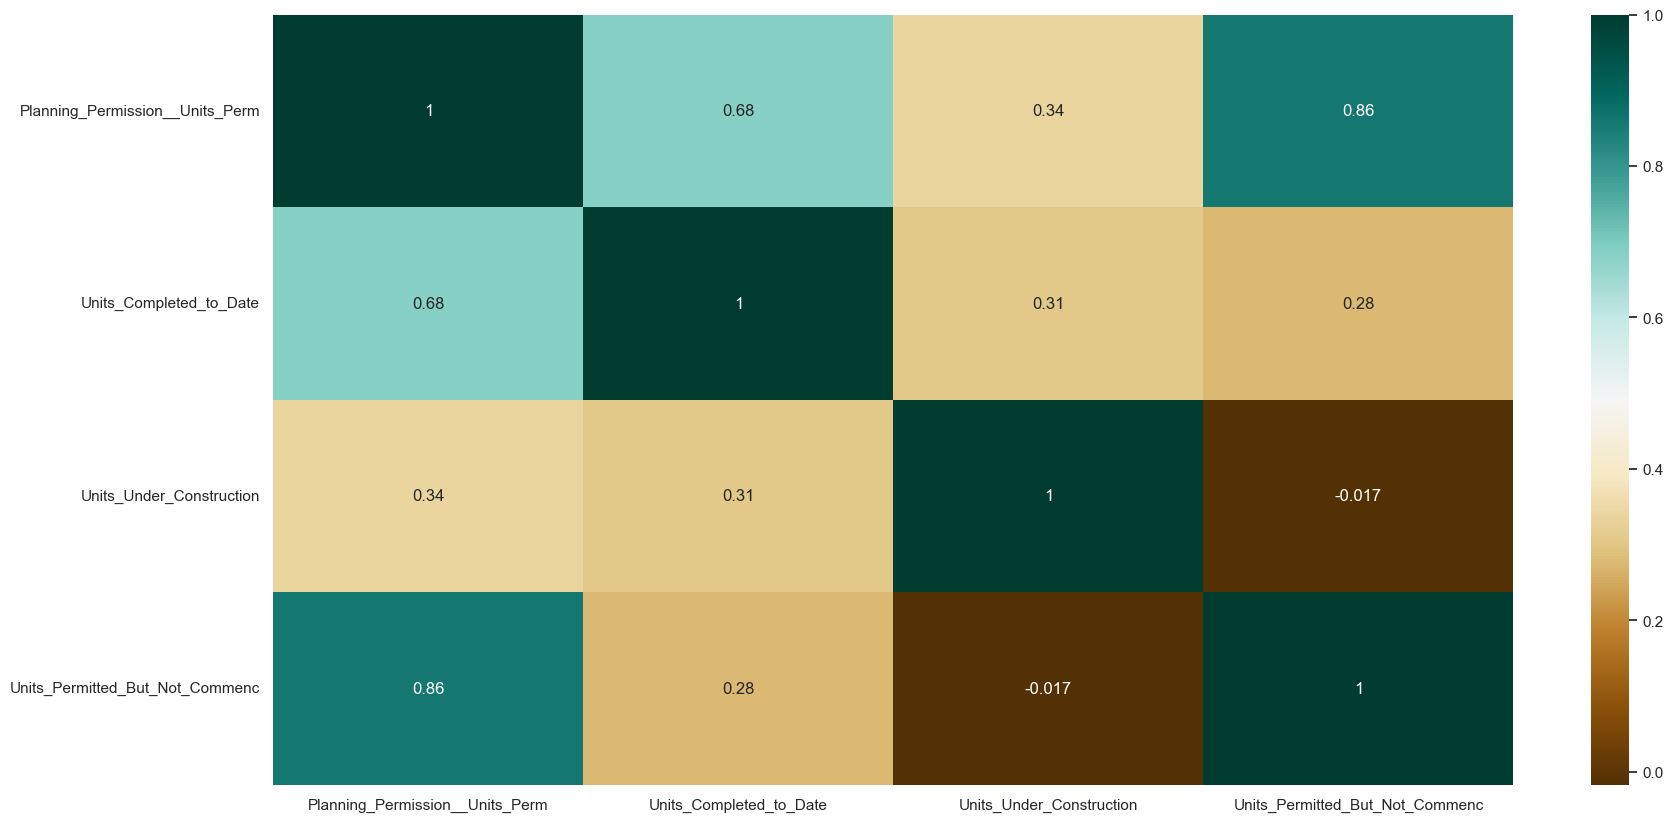

In [18]:
# Finding the relations between the variables through a heat map
plt.figure(figsize=(20,10)) 
c= planning_df.corr() 
sns.heatmap(c,cmap="BrBG",annot=True) 
c 
# There is a strong correlation 0.86 between the variables Planning Permission Units perm and Units Permitted but not commenced.
# Likewise, there is a moderate correlation 0.68 between units completed to date and planning permission units perm.
# In contrast, there is a negative correlation between Units permitted but not commenc and units under construction.

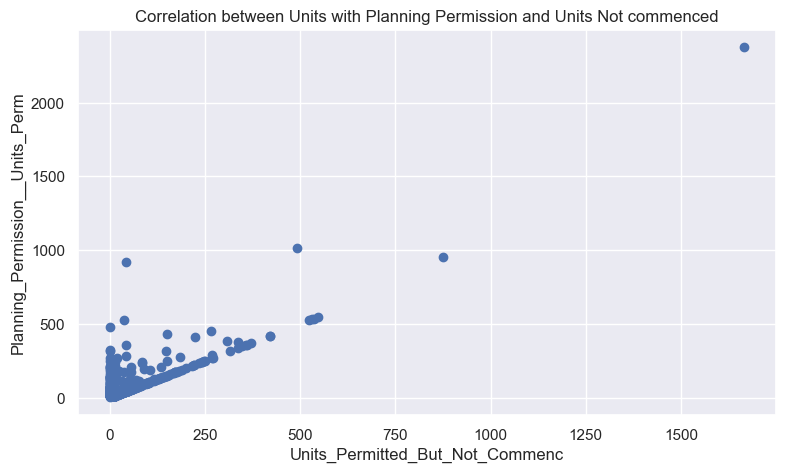

In [19]:
#Ploting a scatter plot to find the correlation between two variables

fig, ax = plt.subplots(figsize=(9,5)) 
#sns.set_style('whitegrid')
ax.scatter(planning_df['Units_Permitted_But_Not_Commenc'], planning_df['Planning_Permission__Units_Perm']) 
ax.set_xlabel('Units_Permitted_But_Not_Commenc') 
ax.set_ylabel('Planning_Permission__Units_Perm') 
plt.title("Correlation between Units with Planning Permission and Units Not commenced");
plt.show() 

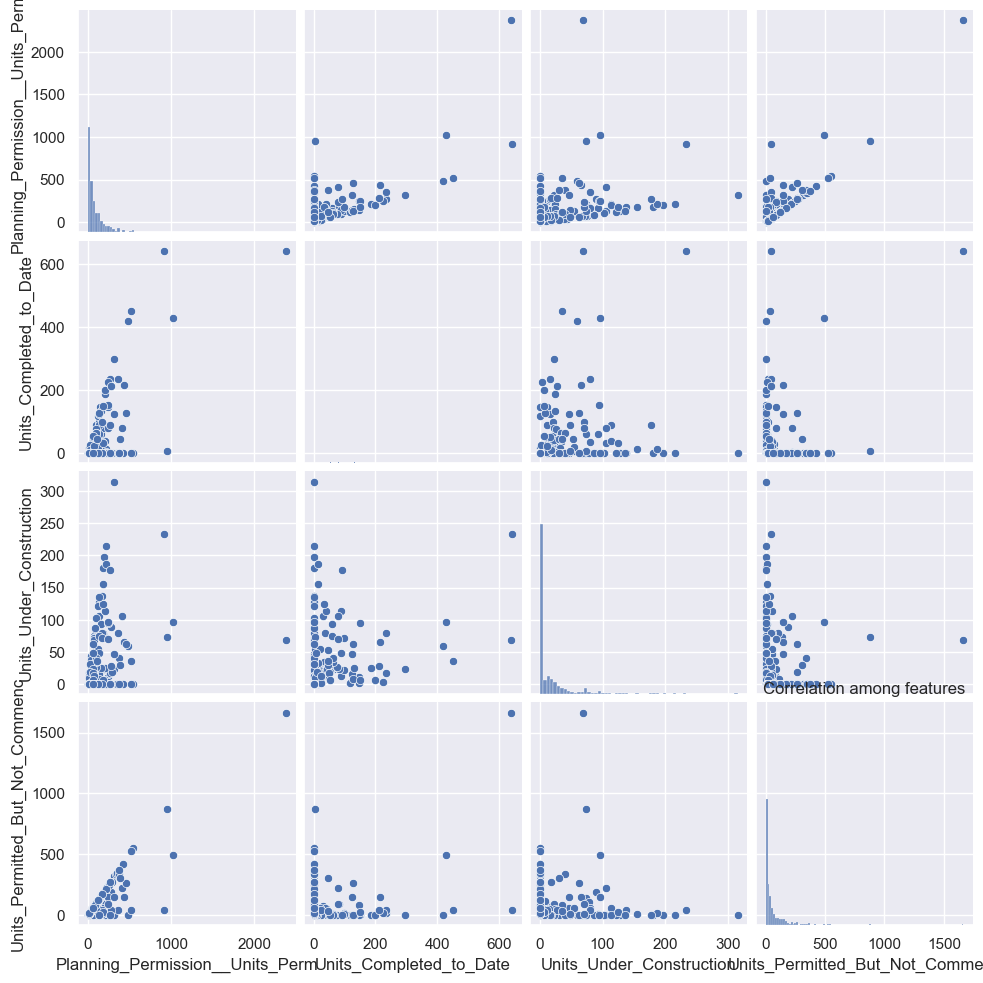

In [20]:
# correlation to check variable around other variable to check if there is 
# a relationship between those variables through pairplot
sns.pairplot(planning_df);
plt.title("Correlation among features");

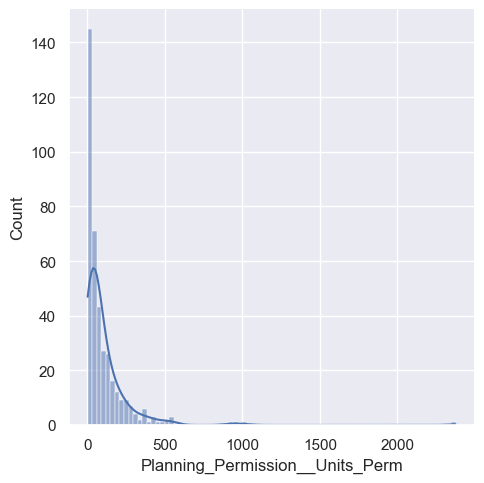

In [21]:
# Visualizing the Planning_Permissions_Unit_Perm variable
# It can be seen that data is positive skewed in this feature.
sns.displot(data=planning_df, x="Planning_Permission__Units_Perm", kde=True);

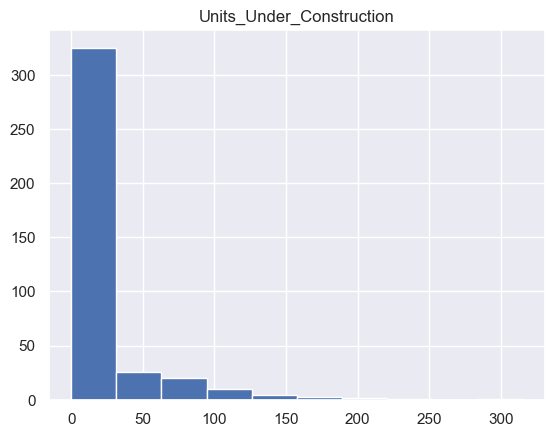

In [22]:
# Visualizing a histogram to verify the shape of the data. It is positive skewed
planning_df.hist(column='Units_Under_Construction');

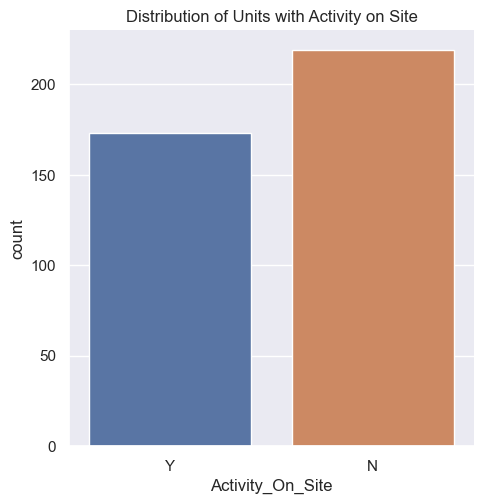

In [23]:
# Bar chart with the units with Activity on site. There are 219 with no activity and 174 with activity on site.
sns.catplot(x="Activity_On_Site", data=planning_df, kind="count");
plt.title("Distribution of Units with Activity on Site");

In [24]:
# Number of units of activity on site "Yes" or "No" to check amounts on bar chart on previous step.
planning_df["Activity_On_Site"].value_counts()

N    219
Y    173
Name: Activity_On_Site, dtype: int64

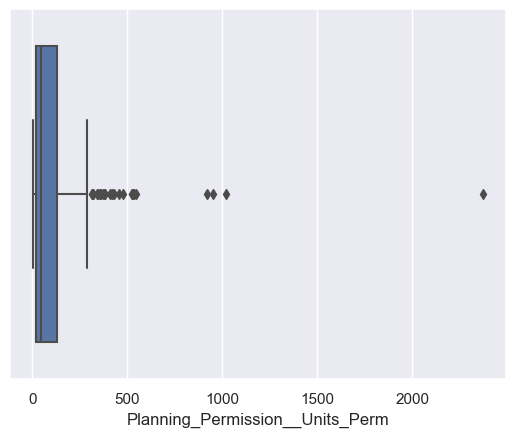

In [25]:
# Detecting Outliers
# As it can be seen below, there are ouliers in each of the variables of my dataset.
sns.boxplot(x=planning_df['Planning_Permission__Units_Perm']); 

<Axes: xlabel='Units_Completed_to_Date'>

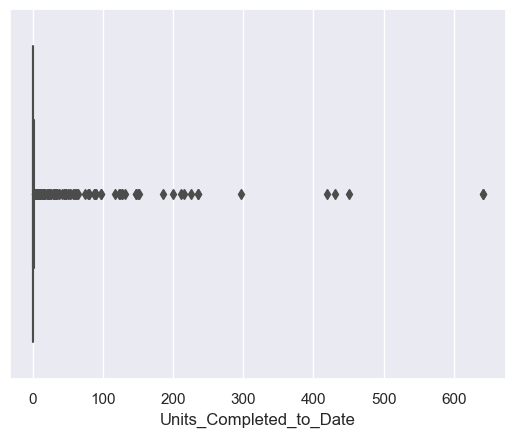

In [26]:
# Checking outliers on Units_Completed_to_Date variable # data is skewed
sns.boxplot(x=planning_df['Units_Completed_to_Date']) 

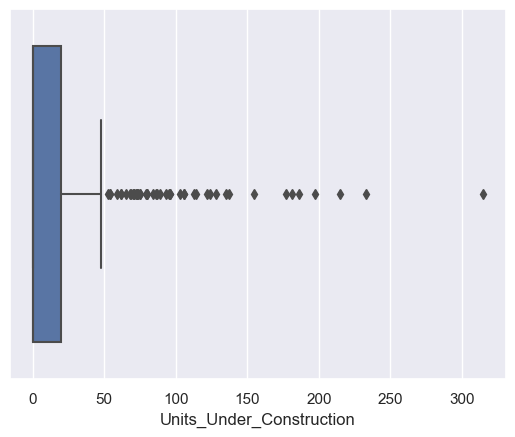

In [27]:
# Detecting outliers on Units_Under_Construction variable
sns.boxplot(x=planning_df['Units_Under_Construction']); 

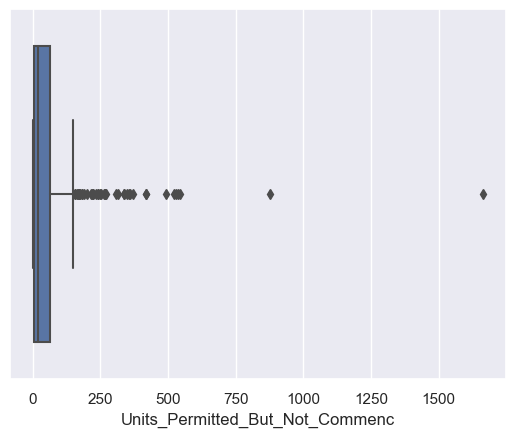

In [28]:
# Detecting outliers on Units_Permitted_But_Not_Commenc variable
sns.boxplot(x=planning_df['Units_Permitted_But_Not_Commenc']); 

## 2. Machine Learning models 
The machine learning models chosen are SVM, Decision tree, Random Forest and Naive Bayes for classification. 

## 2.1. Support Vector Machine (SVC for classification)

I have decided not to drop the outliers as these are valid observations, which I would like to keep before performing machine learning models. SVM can be sensitive to outliers, but I would like to compare its performance towards the other 3 models.                                                         


In [29]:
# Feautre selection.
#Selecting dependent and independent variables before implementing Machine Learning models
X = planning_df.iloc[:, [0,1,2,3,5]].values  # independent variables
y = planning_df.iloc[:, 4].values            # target or dependent variable

In [30]:
#Printing X variables to check them before performing model
X

array([['Dublin City Council', 15, 0, 15, 0],
       ['Dublin City Council', 25, 14, 11, 0],
       ['Dublin City Council', 88, 0, 43, 45],
       ...,
       ['South Dublin County Council', 524, 0, 0, 524],
       ['South Dublin County Council', 122, 0, 0, 122],
       ['South Dublin County Council', 60, 0, 0, 60]], dtype=object)

In [31]:
#Printing y variables 
y

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N', 'N

In [32]:
# Encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)  

[[1.0 0.0 0.0 ... 0 15 0]
 [1.0 0.0 0.0 ... 14 11 0]
 [1.0 0.0 0.0 ... 0 43 45]
 ...
 [0.0 0.0 0.0 ... 0 0 524]
 [0.0 0.0 0.0 ... 0 0 122]
 [0.0 0.0 0.0 ... 0 0 60]]


In [33]:
# printing the X variables to check the array of numbers after encoding the variables
X

array([[1.0, 0.0, 0.0, ..., 0, 15, 0],
       [1.0, 0.0, 0.0, ..., 14, 11, 0],
       [1.0, 0.0, 0.0, ..., 0, 43, 45],
       ...,
       [0.0, 0.0, 0.0, ..., 0, 0, 524],
       [0.0, 0.0, 0.0, ..., 0, 0, 122],
       [0.0, 0.0, 0.0, ..., 0, 0, 60]], dtype=object)

In [34]:
#Creating a new dataframe to add the four columns for each type to the end of my dataframe
one_hot_planning_df = pd.get_dummies(planning_df, prefix="Planning_Authority",
                            columns=["Planning_Authority"], 
                            drop_first=False)
one_hot_planning_df.head()

,Planning_Permission__Units_Perm,Units_Completed_to_Date,Units_Under_Construction,Activity_On_Site,Units_Permitted_But_Not_Commenc,Planning_Authority_Dublin City Council,Planning_Authority_Dun Laoghaire-Rathdown,Planning_Authority_Fingal County Council,Planning_Authority_South Dublin County Council
0,15,0,15,Y,0,1,0,0,0
1,25,14,11,Y,0,1,0,0,0
2,88,0,43,Y,45,1,0,0,0
3,75,0,75,Y,0,1,0,0,0
4,99,65,24,Y,10,1,0,0,0


In [35]:
#Encoding the dependent variable "Activity on site" with Label Encoder

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y = le.fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [36]:
# split Train and Test. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) # Test size 25% and 75% for training test

In [37]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler

# Create and initialise an object (sc) by calling a method named as StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transform the data into standised form
X_test = sc.transform(X_test)

## Verify that shape of data has not changed after Standardization

In [38]:
#checking the efect of scale in the data
#from sklearn.preprocessing import scale
#planning_df['scale_Planning_Permission__Units_Perm'] = scale(planning_df['Planning_Permission__Units_Perm'])

#Feature scaling to check if data shape has not been changed
from sklearn.preprocessing import StandardScaler
planning_df["standardized"]=StandardScaler().fit_transform(planning_df[["Planning_Permission__Units_Perm"]])

Text(47.5, 0.5, 'Planning Permissions')

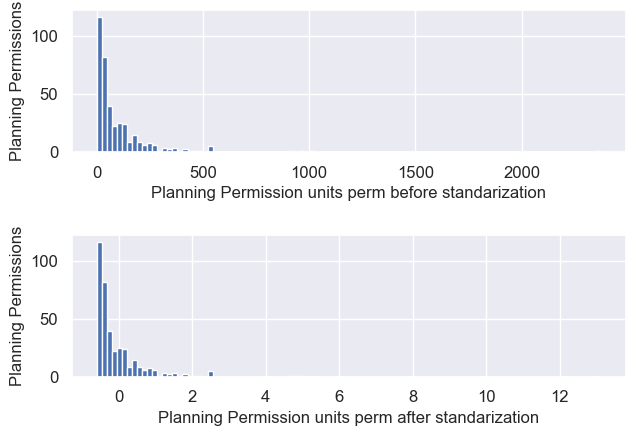

In [39]:
#Visualization of feature before and after standardization
from matplotlib import pyplot as plt
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(7, 5))
fig.tight_layout(pad=3.0)

planning_df['Planning_Permission__Units_Perm'].hist(ax=ax1, bins=100)
ax1.tick_params(labelsize=12)
ax1.set_xlabel('Planning Permission units perm before standarization', fontsize=12)
ax1.set_ylabel('Planning Permissions', fontsize=12)

planning_df['standardized'].hist(ax=ax2, bins=100)
ax2.tick_params(labelsize=12)
ax2.set_xlabel('Planning Permission units perm after standarization', fontsize=12)
ax2.set_ylabel('Planning Permissions', fontsize=12) 

In [40]:
# Support Vector Classification model
# Create an object by calling SCV() and train the model
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        51
           1       1.00      0.79      0.88        47

    accuracy                           0.90        98
   macro avg       0.92      0.89      0.90        98
weighted avg       0.91      0.90      0.90        98



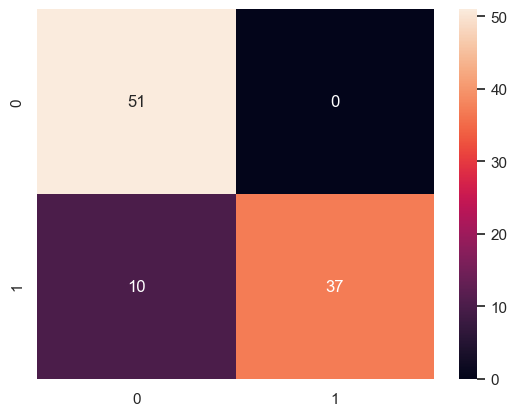

In [41]:
# Model evaluation 
from sklearn.metrics import classification_report, confusion_matrix

# Display the predicted results using classification report and confusion matrix
y_pred = svc_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_pred))

In [42]:
# Model Accuracy, how often is the classifier correct? # 0.8979
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8979591836734694


In [43]:
#find best hyper parameters
#In other words, to use grid search to find optimal hyperparameters, 
#you can use the optimal number of values that you can use for your model

# creating a KFold object with 5 splits, you can go for 10, 20, whichever produces better accuracy
from sklearn.model_selection import KFold

# specify range of hyperparameters
# Set the parameters by cross-validation
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)
from sklearn.model_selection import GridSearchCV
hyper_params = [ {'gamma': [0.01, 0.001, 0.0001],
                     'C': [1, 10, 100, 1000]}]

# specify model
svc_model = SVC(kernel="rbf") # this one is quickier

# set up GridSearchCV()
svc_model_cv = GridSearchCV(estimator = svc_model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1, # the level of information I want to display
                        return_train_score=True)  # 60 combinations

# fit the model
svc_model_cv.fit(X_train, y_train)     

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [44]:
# cv results
cv_results = pd.DataFrame(svc_model_cv.cv_results_)# looking for mean test score
cv_results.head()
#Checking mean test score column to find the best parameters

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003201,0.000747,0.001799,0.000400,1,0.01,"{'C': 1, 'gamma': 0.01}",0.762712,0.610169,0.813559,...,0.751783,0.072910,9,0.770213,0.787234,0.774468,0.753191,0.750000,0.767021,0.013822
1,0.004818,0.001171,0.003906,0.000127,1,0.001,"{'C': 1, 'gamma': 0.001}",0.627119,0.508475,0.627119,...,0.598656,0.046013,11,0.600000,0.629787,0.595745,0.591489,0.601695,0.603743,0.013495
2,0.004432,0.001219,0.003005,0.001101,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.610169,0.491525,0.593220,...,0.571420,0.042050,12,0.561702,0.591489,0.565957,0.565957,0.572034,0.571428,0.010557
3,0.002216,0.000393,0.001181,0.000366,10,0.01,"{'C': 10, 'gamma': 0.01}",0.898305,0.881356,0.881356,...,0.898071,0.018141,5,0.906383,0.902128,0.910638,0.902128,0.898305,0.903916,0.004223
4,0.002633,0.000505,0.001478,0.000451,10,0.001,"{'C': 10, 'gamma': 0.001}",0.813559,0.644068,0.813559,...,0.775570,0.066227,8,0.787234,0.800000,0.778723,0.770213,0.758475,0.778929,0.014194


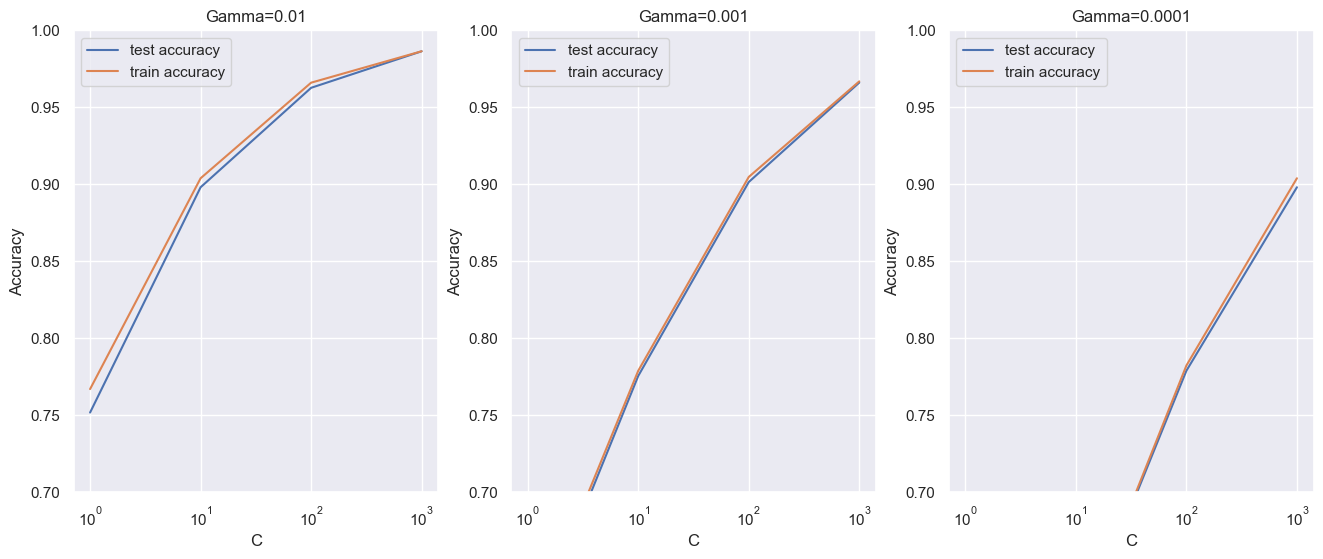

In [45]:
# converting C to numeric type for plotting on x-axis
# I am going to take 3 different combinations to check which one is better
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.70, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.70, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.70, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
#if testing is high and training set are low, there is overfitting the model

**Discussion the results of this plot:**

High values of gamma and  high values of C leads to expected accuracy. The training accuracy at gamma=0.01 and C=1000 reaches 98%
The training score increases with higher gamma, though the test scores are comparable (at sufficiently high cost, i.e. C > 10)
The model does not underfit but the less recommended model would be with gamma 0.0001 and high values of C.

In [46]:
# printing the optimal accuracy score and hyperparameters
best_score = svc_model_cv.best_score_
best_hyperparams = svc_model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9863822326125072 corresponding to hyperparameters {'C': 1000, 'gamma': 0.01}


Building and Evaluating the Final Model¶

Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [47]:
# specify optimal hyperparameters
best_params = {"C": 1000, "gamma": 0.01, "kernel":"rbf"}

# model
svc_model = SVC(C=1000, gamma=0.01, kernel="rbf")

svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

# metrics
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))
print("precision", metrics.precision_score(y_test, y_pred))
print("sensitivity/recall", metrics.recall_score(y_test, y_pred))

[[50  1]
 [ 1 46]] 

accuracy 0.9795918367346939
precision 0.9787234042553191
sensitivity/recall 0.9787234042553191


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.814 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.797 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.847 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.763 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.759 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.746 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.729 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.763 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.695 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.559 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

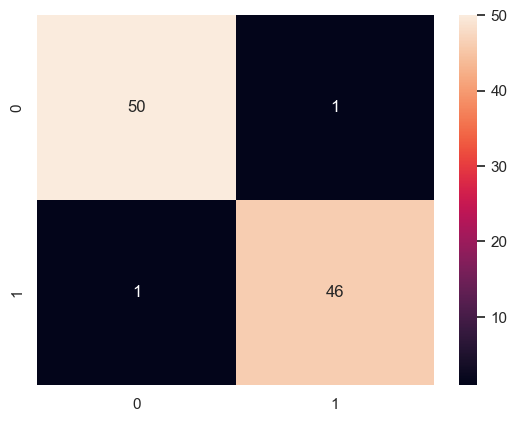

In [48]:
#find best hyper parameters
#In other words, to use grid search to find optimal hyperparameters, 
#you can use the optimal number of values that you can use for your model

from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,verbose = 4)
grid.fit(X_train,y_train)
grid.best_params_
grid.best_estimator_
grid_predictions = grid.predict(X_test)

#confusion matrix
cmG = confusion_matrix(y_test,grid_predictions)
sns.heatmap(cmG, annot=True)
print(classification_report(y_test,grid_predictions))

After finding the best parameters through GridSearchCV, the model increased accurary to **0.98**. Out of 98 units, it was possible to predict 50 units which are not available to meet the current demand of houses and 1 that was incorrect predicted as not available, when it really was (Type one error). In contrast, the model was successful at predicting 46 units to supply the demand of housing, with 1 unit being available, when is was not (type two error)

# 2.1.1. Aplying Normalization to improve SVM the model.

The first time that I was performing the model I did try to apply normalization to improve it (step 43-45) but the accuracy was reduced to 77% instead of improving. This was due to normalization was not needed to be implemented on this and detailed below just to make a comparison. Hence, the feaure scaling techique applied was standarization to acchieve 0.89 accuary [step # 37 above]

In [49]:
#normalized scaler - fit&transform on train, fit only on test

from sklearn.preprocessing import MinMaxScaler


# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

In [50]:
#Support Vector Classification model -  apply on scaled data
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_norm, y_train)

#Support Vector Classification model -  apply on scaled data
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train_norm, y_train)

SVC()

              precision    recall  f1-score   support

           0       0.69      1.00      0.82        51
           1       1.00      0.51      0.68        47

    accuracy                           0.77        98
   macro avg       0.84      0.76      0.75        98
weighted avg       0.84      0.77      0.75        98



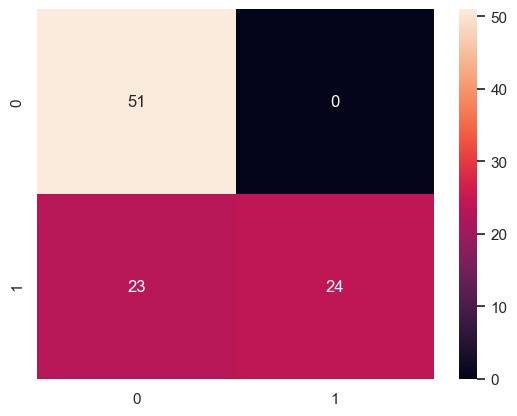

In [51]:
#from sklearn.metrics import classification_report, confusion_matrix
y_predict_norm = svc_model.predict(X_test_norm)
cm = confusion_matrix(y_test, y_predict_norm)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict_norm))

In [52]:
# Model Accuracy after applying normalization. It did not improve in the end as normalization 
# was not needed on this case

print("Accuracy on training set: {:.3f}".format(
svc_model.score(X_train_norm, y_train)))
print("Accuracy on test set: {:.3f}".format(svc_model.score(X_test_norm, y_test)))

Accuracy on training set: 0.772
Accuracy on test set: 0.765


## 2.2. Decision tree classifier algorithm


I did also evaluate my dataset with Decision Tree Classifier as this model is not sensitive to outliers

In [53]:
# performing preprocessing part
from sklearn.preprocessing import StandardScaler

# Create and initialise an object (sc) by calling a method named as StandardScaler()
sc = StandardScaler()

# Train the model by calling a method fit_transform()
X_train = sc.fit_transform(X_train)

# Transform the data into standised form
X_test = sc.transform(X_test)

In [54]:
# Display the Number of rows and columns before (X, y) and after Splitting (X_train, X_test, y_train, y_test)
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((392, 8), (392,), (294, 8), (98, 8), (294,), (98,))

In [55]:
#Training the Decision Tree Classification model on the Training set

# Load the library 'sklearn.tree'
from sklearn.tree import DecisionTreeClassifier

# Create and initialise a DecisionTreeClassifier
classifier = DecisionTreeClassifier() # I did removed (max_depth = 4, random_state = 0) will improve accuracy

# Train the classifier by calling a method 'fit()'
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
#Predicting the test set results
y_pred = classifier.predict(X_test)

In [57]:
from sklearn import metrics   # Import scikit-learn metrics module for accuracy calculation
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) ## 0.9795

Accuracy: 0.9795918367346939


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.98      0.98      0.98        47

    accuracy                           0.98        98
   macro avg       0.98      0.98      0.98        98
weighted avg       0.98      0.98      0.98        98



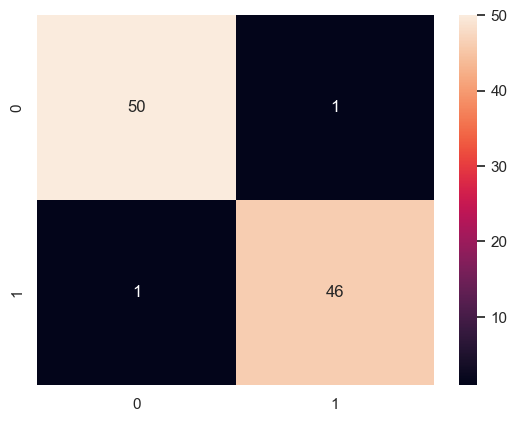

In [58]:
#Making the Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

[Text(0.75, 0.9375, 'x[6] <= -0.448\ngini = 0.49\nsamples = 294\nvalue = [168, 126]'),
 Text(0.625, 0.8125, 'x[5] <= -0.27\ngini = 0.034\nsamples = 171\nvalue = [168, 3]'),
 Text(0.5, 0.6875, 'x[2] <= 0.421\ngini = 0.023\nsamples = 170\nvalue = [168, 2]'),
 Text(0.375, 0.5625, 'gini = 0.0\nsamples = 129\nvalue = [129, 0]'),
 Text(0.625, 0.5625, 'x[7] <= 0.008\ngini = 0.093\nsamples = 41\nvalue = [39, 2]'),
 Text(0.5, 0.4375, 'x[7] <= -0.064\ngini = 0.153\nsamples = 24\nvalue = [22, 2]'),
 Text(0.375, 0.3125, 'x[4] <= -0.425\ngini = 0.083\nsamples = 23\nvalue = [22, 1]'),
 Text(0.25, 0.1875, 'x[7] <= -0.32\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.125, 0.0625, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.375, 0.0625, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5, 0.1875, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.625, 0.3125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.75, 0.4375, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.75, 0.6

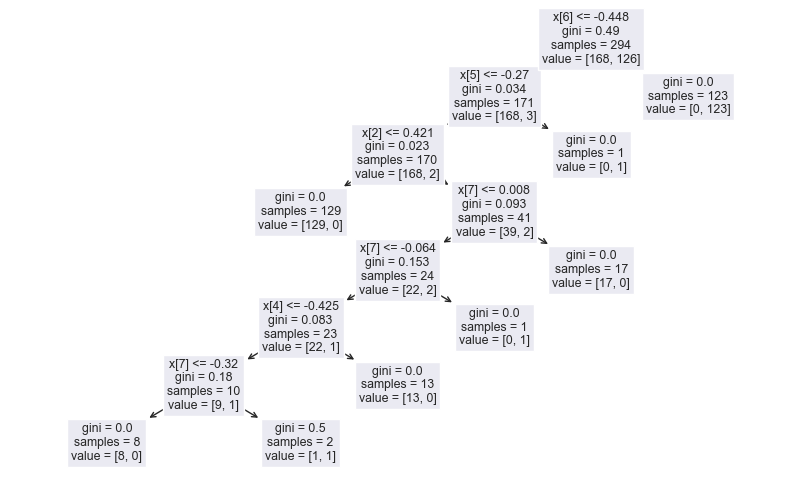

In [59]:
#Visualizing Decision Tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

from sklearn import tree

tree.plot_tree(classifier.fit(X_train, y_train)) 

In [60]:
#Optimizing Decision Tree Performance

# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = classifier.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) ##0.9897

Accuracy: 0.9897959183673469


              precision    recall  f1-score   support

           0       0.98      1.00      0.99        51
           1       1.00      0.98      0.99        47

    accuracy                           0.99        98
   macro avg       0.99      0.99      0.99        98
weighted avg       0.99      0.99      0.99        98



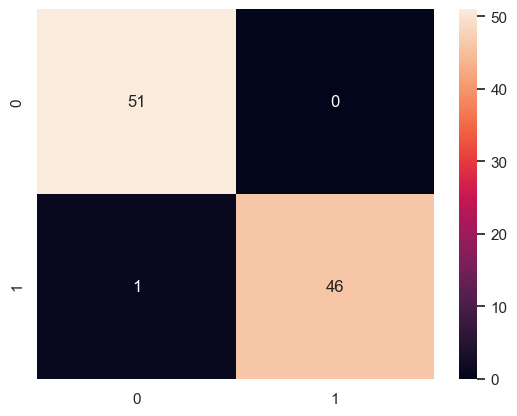

In [61]:
# Calculate cm by calling a method named as 'confusion_matrix' after improving the model
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

I had 98 units in my test set. Out of 51 units were predicted to not to be available, and 1 was classified as not been able to be put in the market, when it really was (type one error). Out of 46 units were correctly predicted to be available to be put in the market and there was no type two error.

[Text(0.6, 0.875, 'x[6] <= -0.448\nentropy = 0.985\nsamples = 294\nvalue = [168, 126]'),
 Text(0.4, 0.625, 'x[2] <= 0.421\nentropy = 0.127\nsamples = 171\nvalue = [168, 3]'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 129\nvalue = [129, 0]'),
 Text(0.6, 0.375, 'x[5] <= -0.27\nentropy = 0.371\nsamples = 42\nvalue = [39, 3]'),
 Text(0.4, 0.125, 'entropy = 0.281\nsamples = 41\nvalue = [39, 2]'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 123\nvalue = [0, 123]')]

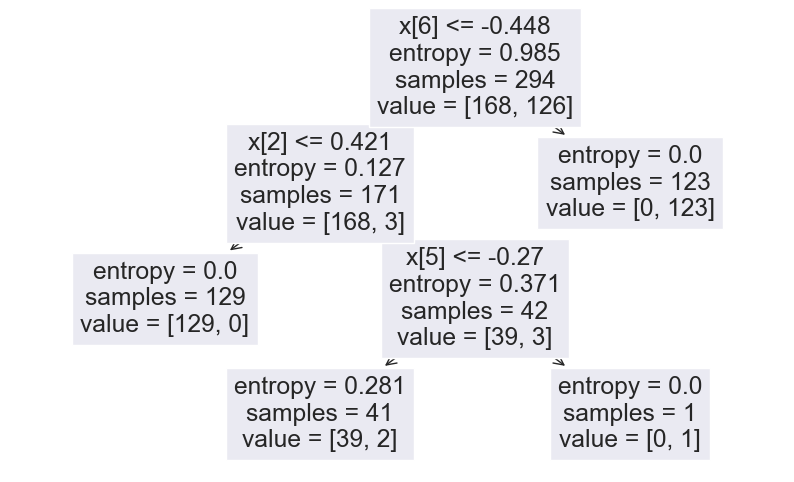

In [62]:
#Visualizing Decision Tree after model was optimized
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

from sklearn import tree

tree.plot_tree(classifier.fit(X_train, y_train)) 

## 2.3. Random Forest (GNB) classifier algorithm

I did evaluate my dataset with Random Forest Classifier as this is also robust to outliers.

In [63]:
# Feature Scaling # I did perform the model with and without standarization and accuracy was the same 0.97.
# It was not needed to perform this model
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)
#print(X_train)
#print(X_test)

In [64]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [65]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

In [66]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) ##0.9591

Accuracy: 0.9795918367346939


In [67]:
# Display the accuracy of the model
print("Random Forest score: ",clf.score(X_test, y_test)) #09693

Random Forest score:  0.9795918367346939


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.98      0.98      0.98        47

    accuracy                           0.98        98
   macro avg       0.98      0.98      0.98        98
weighted avg       0.98      0.98      0.98        98



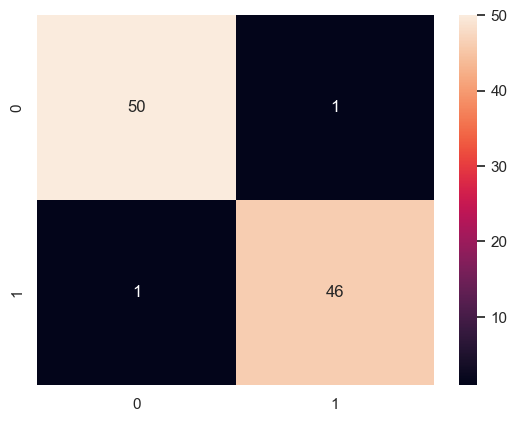

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

As the above table, it can be seen that the model performs quite well as from a total of 98 units, it was possible to predict 50 units which are not available to meet the current demand of houses and 1 that was incorrect predicted as not available, when it really was (Type one error). In contrast, the model was successful at predicting 46 units to supply the demand of housing, with 1 unit available, when is not (type two error)

## 2.4. Gaussian Naive Bayes (GNB) classifier algorithm

Finally, I did evaluate my model with the last algorithm, which is Naive Bayes, which is also robust to extreme values (outliers)

In [69]:
# Split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [70]:
# Display the rows and columns of the dataset
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((392, 8), (392,), (294, 8), (98, 8), (294,), (98,))

In [71]:
# Import the library for Gaussian Naive Bayes Classifier 
from sklearn.naive_bayes import GaussianNB

# Create and initialise the object by calling a method GaussianN()
nb = GaussianNB()

# Train the model by calling a fit() method
nb.fit(X_train, y_train)

GaussianNB()

In [72]:
# Display the accuracy of the model
print("Naive Bayes score: ",nb.score(X_test, y_test)) #09693

Naive Bayes score:  0.9795918367346939


In [73]:
#Checking accuracy on test and training set
print("Accuracy on training set: {:.3f}".format(
nb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test))) # Test and training set are not in conflict

Accuracy on training set: 0.993
Accuracy on test set: 0.980


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        51
           1       0.98      0.98      0.98        47

    accuracy                           0.98        98
   macro avg       0.98      0.98      0.98        98
weighted avg       0.98      0.98      0.98        98



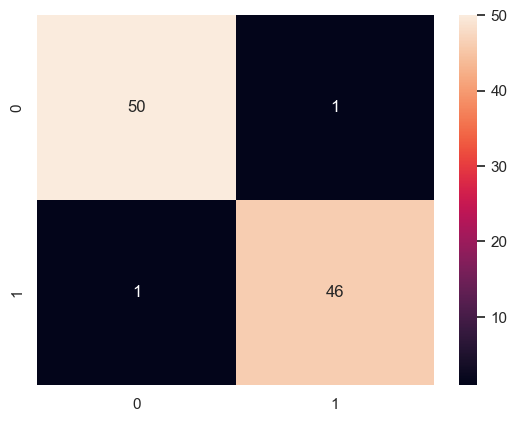

In [74]:
# Model evaluation 
from sklearn.metrics import classification_report, confusion_matrix

# Display the predicted results using classification report and confusion matrix
y_predict = nb.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)
print(classification_report(y_test, y_predict))

As seen above, the results of the I had 98 units in my test set. Out of 49 units were predicted to not to be available to be put in the market, and zero were classified as not been able to be in the market (no type one error). Out of 46 units were successfully predicted to be able to put in the market, while 3 were classified as being able to be put in the market when they are not (type two error).

In [75]:
#Applying K-Cross validation to improve accuracy
from sklearn.model_selection import cross_val_score
nvclassifier = GaussianNB()
cross_val_score(nvclassifier, X, y, scoring='accuracy', cv = 20).mean() #0.9819

0.9819736842105262

After cross validating cv = 20 times, it was able to improve the model accuracy to **0.9819.**

**Conclussion**: To summarized after testing the 4 models above, they all performed well. Despite the fact that all produced good accuracy, Decission Tree would be the one recommended with accuracy of **0.98**, followed by Naive Bayes (after k-cross validation) and SVM after parameters optimization.

## **References:** 

https://data.gov.ie/dataset/tier-1-sites-with-planning-permission3/resource/faf68199-fc52-4009-b12f-89b4e6a552f2

https://www.kaggle.com/questions-and-answers/267585

https://arxiv.org/abs/1409.0934#

https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
